In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap= 'binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

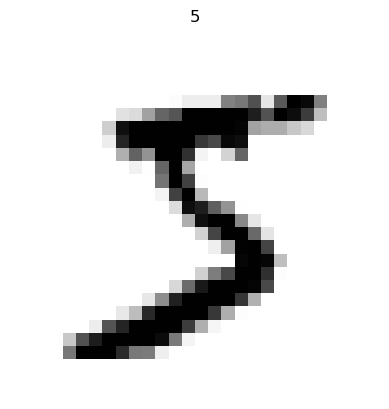

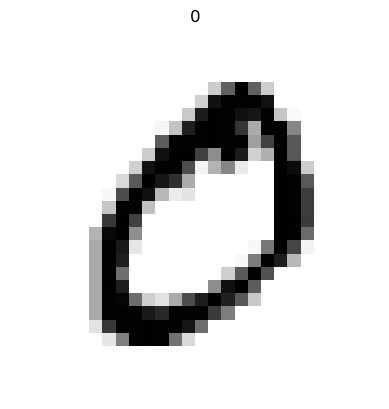

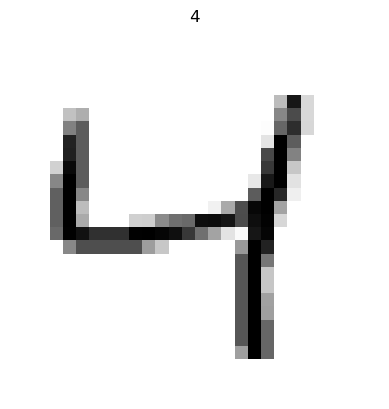

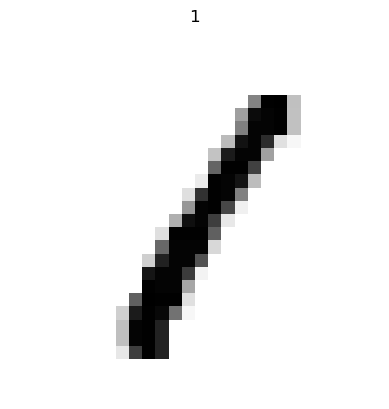

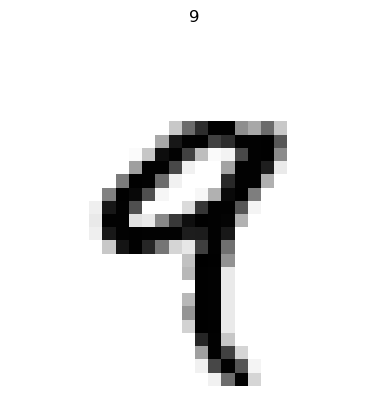

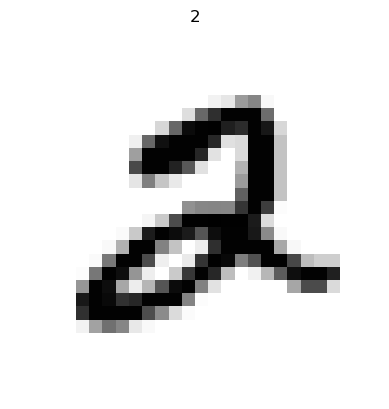

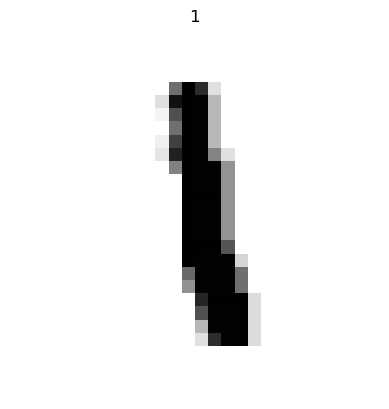

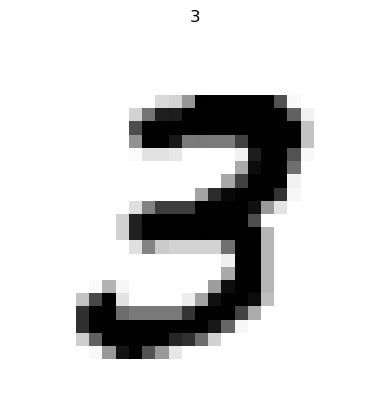

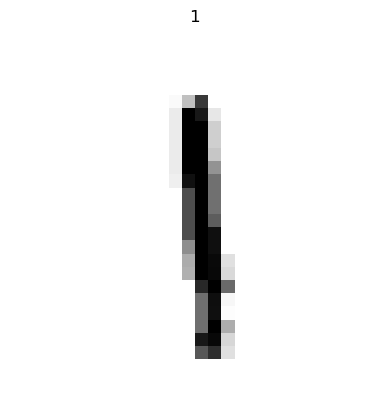

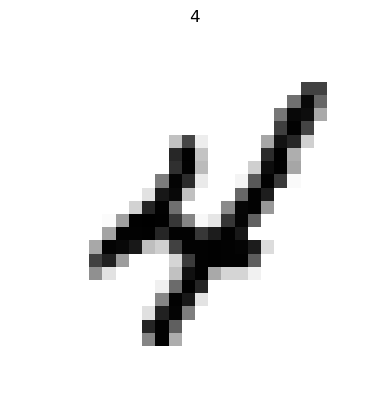

In [5]:
for i in range(10):
    plot_input_img(i)

In [6]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience= 4, verbose= 1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose= 1, save_best_only= True)

cb = [es, mc]

In [11]:
his = model.fit(X_train, y_train, epochs= 20, validation_split= 0.3, callbacks=cb)

Epoch 1/20


1313/1313 [==============================] - 13s 9ms/step - loss: 0.2232 - accuracy: 0.9332 - val_loss: 0.0793 - val_accuracy: 0.9757
Epoch 2/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.0642 - val_accuracy: 0.9800
Epoch 3/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.0524 - val_accuracy: 0.9849
Epoch 4/20
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 5/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 6/20
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0394 - val_accuracy: 0.9877
Epoch 7/20
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0424 - val_

In [12]:
model.save("F:/My Projects/Handwritten Digit Classification/bestmodel.h5")

c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model_S = keras.models.load_model("F:/My Projects/Handwritten Digit Classification/bestmodel.h5")

In [14]:
score = model_S.evaluate(X_test, y_test)

print(f" the model accuracy is {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9917
 the model accuracy is 0.9916999936103821
